In [1]:
import numpy as np
import networkx as nx
import community.community_louvain as community
# https://stackoverflow.com/questions/53017174/attributeerror-module-networkx-algorithms-community-has-no-attribute-best-pa

g = nx.read_edgelist('allcites.txt')
lcc = max(nx.connected_components(g), key=len)
lcc_sg = g.subgraph(lcc).copy()
bp = community.best_partition(lcc_sg)
cidx = list(set(bp.values()))

nlist = []
for cid in cidx:
    ilist = []
    for i in list(g.nodes):
        try:
            if bp[i] == cid:
                ilist.append(i)
        except:
            pass
    nlist.append(ilist)
    
qg = nx.quotient_graph(lcc_sg, nlist)
community_nodes = list(qg.nodes)
qg_properties = [qg.nodes[each] for each in community_nodes]

total = sum([each['nnodes'] for each in qg_properties])
freq_comm = [each['nnodes']/total for each in qg_properties]
node_density_dict = [{'node': i, 'node_density': each} for i, each in enumerate(freq_comm)]
community_nodes = list(qg.nodes)

cart_product_node_idx = []
a = [i for i in range(0, len(community_nodes))]
b = [i for i in range(0, len(community_nodes))]
for i in range(len(a)):
    for j in range(len(b)):
        if i != j:
            cart_product_node_idx.append((a[i], b[j]))
            
edge_density_dict = []
for each in cart_product_node_idx:
    results = dict()
    results['node_01'] = int(each[0])
    results['node_02'] = int(each[1])
    results['weight'] = qg.edges[community_nodes[int(each[0])], community_nodes[int(each[1])]]['weight']
    edge_density_dict.append(results)
    
total_edges = sum([each['weight'] for each in edge_density_dict])

for each in edge_density_dict:
    each['weight_density'] = each['weight'] / total_edges

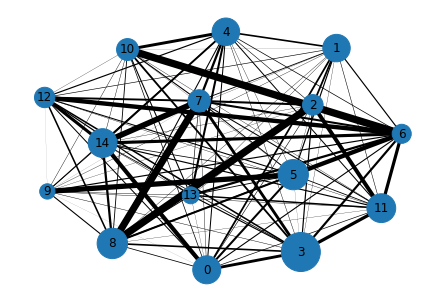

In [2]:
G = nx.Graph()
G.add_edges_from(cart_product_node_idx)
nx.draw(G, 
        node_size=[each['node_density']*10000 for each in node_density_dict],
        with_labels=True, width=[each['weight_density']*250 for each in edge_density_dict])

In [ ]:
# SSIE 641 Lecture Notes

In [ ]:
import numpy as np

A = np.array([[0,0,1,0], 
              [0,0,1,1], 
              [1,1,0,1], 
              [0,1,1,0]])

v = np.array([1, 0, 0, 0]).reshape(4, 1)

In [ ]:
from numpy.linalg import matrix_power

np.matmul(matrix_power(A, 10), v)

# Starting from node 1, there are zero ways to reach node 1, 
# 1 way to reach node 2, three ways to reach node 3 and 1 way to reach node 4.
# Represents how accessible each node is in a purly random movement. 
# Key idea in eigenvector centrality. 

In [ ]:
G = nx.from_numpy_array(A)
nx.draw(G, with_labels=True)

In [ ]:
np.linalg.eig(A)[1][:,2].reshape(4, 1)

In [ ]:
nx.eigenvector_centrality_numpy(nx.from_numpy_array(A))

In [ ]:
# What is transitive closure of a graph.

In [ ]:
dim = 1000
A = np.zeros([dim, dim])
for i in range(dim-1):
    for j in range(1, dim):
        r = np.random.random()
        A[i, j]=r
        A[j, i]=r
eig_A = np.linalg.eigvals(A) #only has real eigenvalues.
plt.hist(eig_A, bins=1000)
plt.axis([-30, 100, 0, 25])
plt.show()

In [ ]:
import matplotlib.pyplot as plt
plt.imshow(A)
plt.show()